# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откроем и изучим файл

In [58]:
# Импортируем библиотеки

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [59]:
# Читаем файл csv

df = pd.read_csv('/Users/danil/Desktop/Data Science/Яндекс Практикум Data Science/5/[SLIV.SITE]Яндекс-практикус часть 5-16/06 Проект/users_behavior.csv')

In [60]:
display(df.head())
display(df.info())
display(df.isna().sum())

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

## Разбем данные на выборки

Разделим исходные данные на обучающую, валидационную и тестовую выборки

In [61]:
# Создаем X – переменную с признаками
# Создаем y – переменную с целевым признаком

X = df.drop(['is_ultra'], axis=1)
y = df['is_ultra']

In [62]:
# Разделяем исходные данные на обучающую, валидационную и тестовую выборки.

X_train, X_test, y_train, y_test = (
    train_test_split(X, y, test_size=0.2, random_state=1)
)

X_train, X_val, y_train, y_val = (
    train_test_split(X_train, y_train, test_size=0.25, random_state=1)
) # 0.25 x 0.8 = 0.2

## Исследуем модели

Исследуем качество разных моделей, меняя гиперпараметры. Кратко напишием выводы исследования.

In [63]:
# Создаем переменную для лучшей модели

best_model = None

In [64]:
# Создаем DecisionTreeClassifier модель,
# и находим лучший параметр глубины

dtc_results = []
best_result = 0
depth_nu = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # обучите модель с заданной глубиной дерева
    model.fit(X_train, y_train) # обучите модель
    predictions = model.predict(X_val) # получите предсказания модели
    result = accuracy_score(y_val, predictions) # посчитайте качество модели
    dtc_results.append(result)
    if result > best_result:
        best_model = model
        best_result = result
        depth_nu = depth

print("Accuracy лучшей модели:", best_result)
print(depth_nu)

Accuracy лучшей модели: 0.7947122861586314
4


In [65]:
# Создаем RandomForestClassifier модель,
# и находим лучший параметр колличества деревьев

dfc_results = []
best_result = 0
best_n_estimators = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=12345, n_estimators=est) # обучите модель с заданным количеством деревьев
    model.fit(X_train, y_train) # обучите модель на тренировочной выборке
    predictions = model.predict(X_val) # получите предсказания модели
    result = accuracy_score(y_val, predictions) # посчитайте качество модели
    dfc_results.append(result)
    if result > best_result:
        best_model = model # сохраните наилучшую модель
        best_result = result #  сохраните наилучшее значение метрики accuracy на валидационных данных
        best_n_estimators = est

print("Accuracy наилучшей модели на валидационной выборке:", best_result)
print(best_n_estimators)

Accuracy наилучшей модели на валидационной выборке: 0.7993779160186625
10


In [66]:
#Создадим таблицу с полученными accuracy

columns=['DecisionTreeClassifier','RandomForestClassifier']

data = pd.DataFrame(columns=columns)
data['DecisionTreeClassifier'] = dtc_results
data['RandomForestClassifier'] = dfc_results

<Axes: title={'center': 'Сравним модели на графике'}, ylabel='Accuracy'>

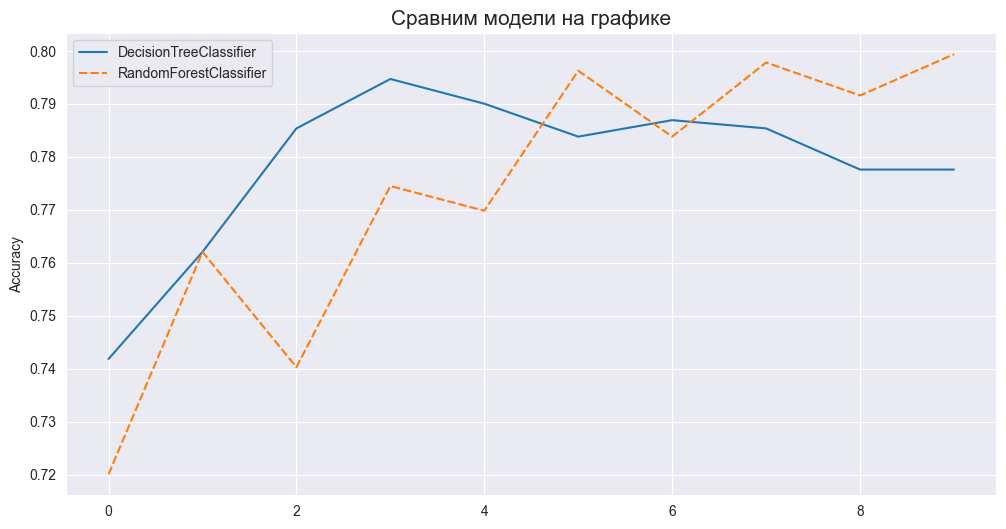

In [67]:
#Отрисуем график, чтобы наглядно увидеть, какая модель нас больше устраивает

plt.figure(figsize=(12, 6))
plt.title('Сравним модели на графике', fontsize=15)
plt.xlabel('')
plt.ylabel('Accuracy')
sns.lineplot(data=data)

In [68]:
# Смотрим лучшую модель

best_model

RandomForestClassifier(n_estimators=10, random_state=12345)

<div class="alert alert-block alert-info">
    <ul type='circle'>
        
## Вывод исследования моделей 
        
   
       
1. Модель **DecisionTreeClassifier** достигла пика на глубине **3**, а затем началось переобучение
        
2. Модель **RandomForestClassifier** с небольшими откатами постоянно увеличивала качество, и добилась максимума на **10** деревьях. Это тот максимум который мы задали. Возможно модель сработала бы лучше, если бы мы задали ее большее количество деревьев.

## Проверим модель на тестовой выборке

In [70]:
# Считаем предстказание и результат для лучшей модели

predictions = best_model.predict(X_test)
accuracy_score(y_test, predictions)

0.7947122861586314

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
